In [189]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np
import os

from scipy.spatial import distance as dist

# **Identifying facial marks**

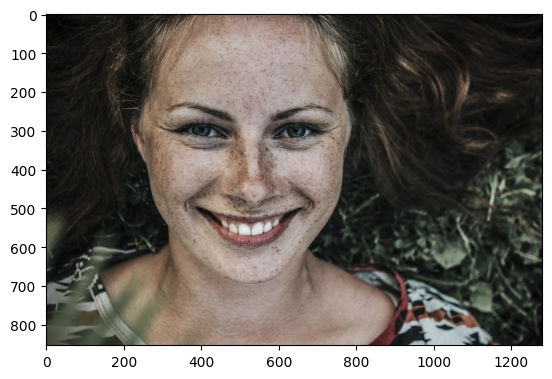

In [190]:
img = cv2.imread('img/px-woman-smilings.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [191]:
dblib_68_classifier_path = "shape_predictor_68_face_landmarks.dat"
dlib_classifier = dlib.shape_predictor(dblib_68_classifier_path)
dlib_face_detector = dlib.get_frontal_face_detector()

In [192]:
def contouring_face(img):
    rectangles = dlib_face_detector(img, 1)

    if len(rectangles) == 0:
        return None, img
    
    for k, d in enumerate(rectangles):
        cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)
    
    return rectangles, img

In [193]:
anotted_img = img.copy()
anotted_img = contouring_face(anotted_img)

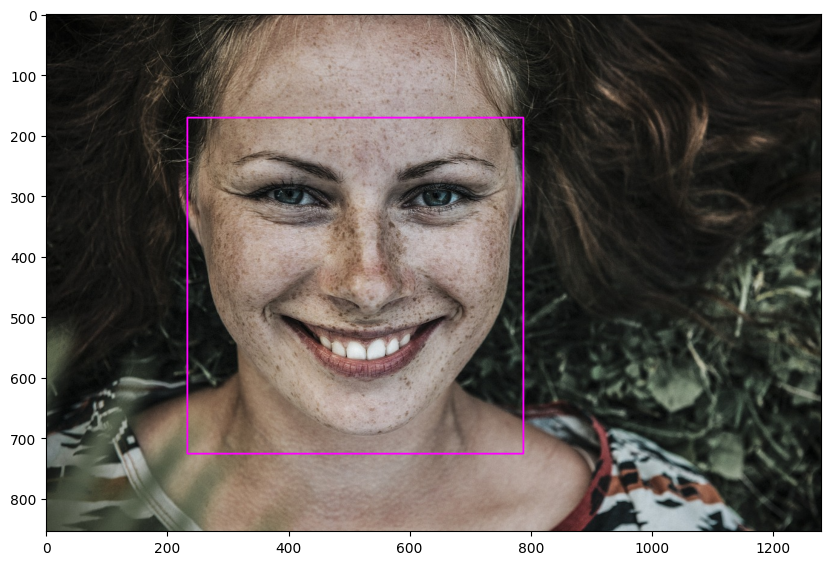

In [194]:
plt.figure(figsize=(10, 10))
plt.imshow(anotted_img[1])


In [195]:
def facial_marks_points (img):
    rectangles, _= contouring_face(img)

    if len(rectangles) is None:
        return None
    
    marks = []

    for ret in rectangles:
       marks.append(np.matrix ([[p.x, p.y] for p in dlib_classifier(img, ret).parts()]))

    return marks

In [196]:
facial_marks = facial_marks_points(img)

len(facial_marks[0])

68

In [197]:
def annotate_facial_marks(img, marks):
    for mark in marks:
        for idx, point in enumerate(mark):
            pos = (point[0, 0], point[0, 1])
            cv2.circle(img, pos, 3,(0, 0, 255), -1)
            cv2.putText(img, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 255, 255), thickness=2)

    return img

In [198]:
annoted_image = img.copy()
annoted_image = annotate_facial_marks(annoted_image, facial_marks)

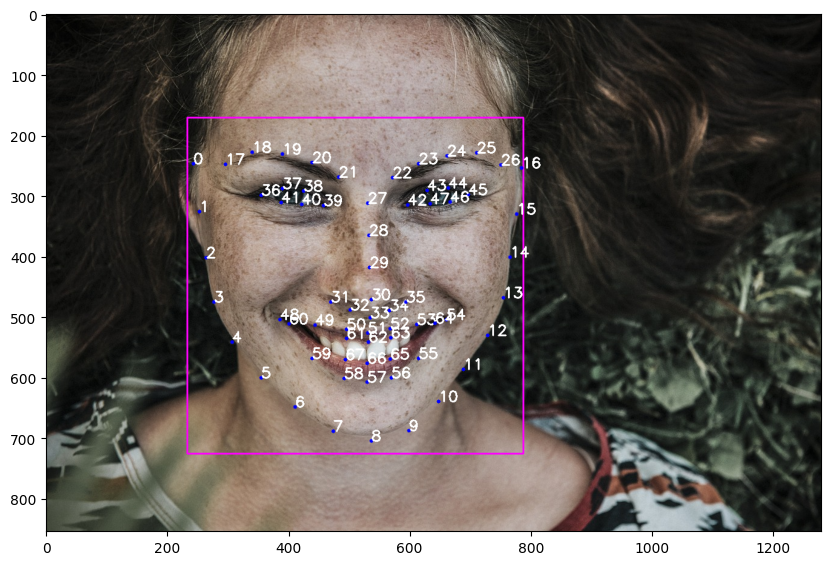

In [199]:
plt.figure(figsize = (10,10))
plt.imshow(annoted_image)

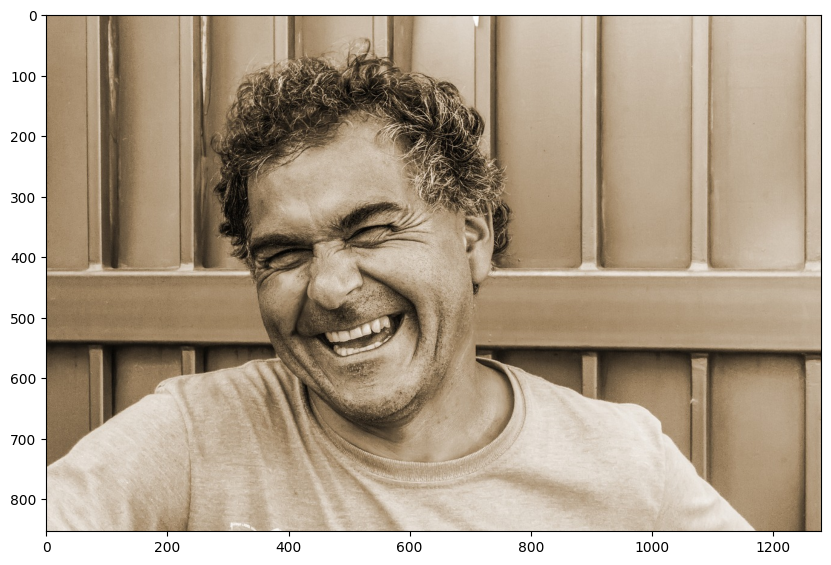

In [200]:
img_two = cv2.imread('img/px-man-happy.jpg')
img_two = cv2.cvtColor(img_two, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img_two)

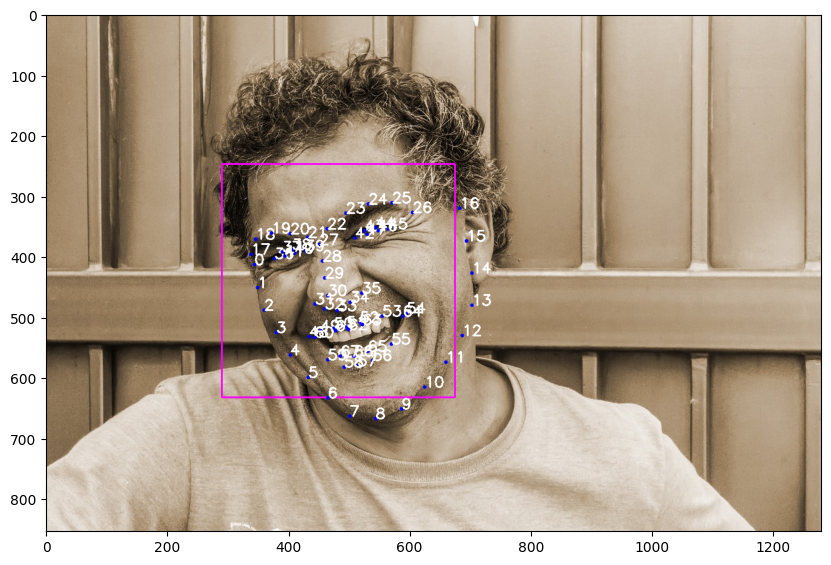

In [201]:
annoted_image_two = img_two.copy()
facial_marks_two = facial_marks_points(annoted_image_two)
annoted_image_two = annotate_facial_marks(annoted_image_two, facial_marks_two)
plt.figure(figsize = (10,10))
plt.imshow(annoted_image_two)


# **Analysing facial marks (like eyes, mouth)**

In [202]:
face = list(range(17, 68))
complete_face = list(range(0, 68))
lips = list(range(48, 61))
left_eyebrows = list(range(22, 27))
right_eyebrows = list(range(17, 22))
right_eye = list(range(36, 42))
left_eye = list(range(42, 48))
nose = list(range(27, 35))
jaw = list(range(0, 17))

In [203]:
def eye_aspect_ratio(eye):

    eye = np.squeeze(np.asarray(eye))
    
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    
    ear = (A + B) / (2.0 * C)
    return ear

In [204]:
def annotate_convex_shell_marks(img, marks):
    result = contouring_face(img)
    
    rectangles, _ = result
    
    
    if len(rectangles) == 0:
        return None
    
    for idx, ret in enumerate(rectangles):
        mark = marks[idx]

        points = cv2.convexHull(mark[left_eye])
        cv2.drawContours(img, [points], 0, (0, 255, 0), 2)

        points = cv2.convexHull(mark[right_eye])
        cv2.drawContours(img, [points], 0, (0, 255, 0), 2)

    return img

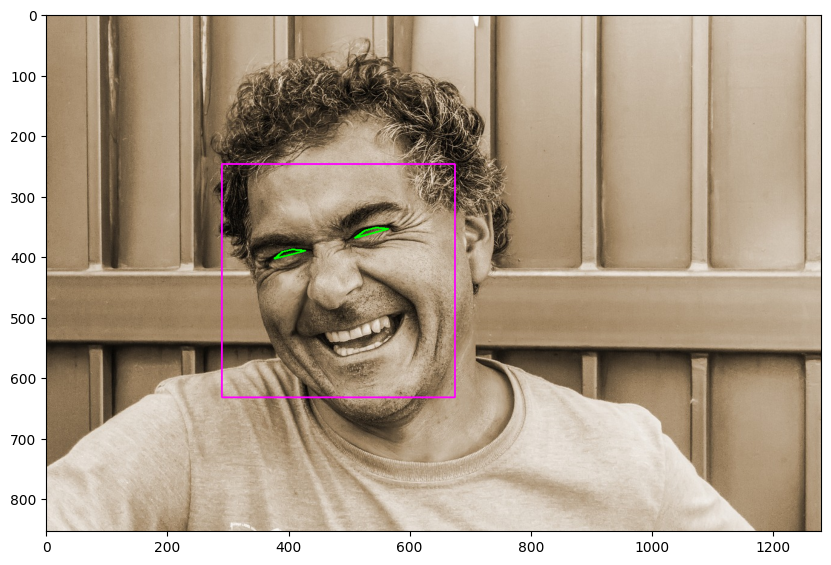

In [205]:
annoted_image_two = img_two.copy()
annoted_image_two= annotate_convex_shell_marks(annoted_image_two, facial_marks_two)
plt.figure(figsize = (10,10))
plt.imshow(annoted_image_two)

In [206]:
left_eye_values = eye_aspect_ratio(facial_marks_two[0][left_eye])
left_eye_values

np.float64(0.11940466781396446)

In [207]:
right_eye_values = eye_aspect_ratio(facial_marks_two[0][right_eye])
right_eye_values

np.float64(0.1450990993454661)

In [208]:
serious_people = cv2.imread('img/px-man-serious.jpg')
serious_people = cv2.cvtColor(serious_people, cv2.COLOR_BGR2RGB)

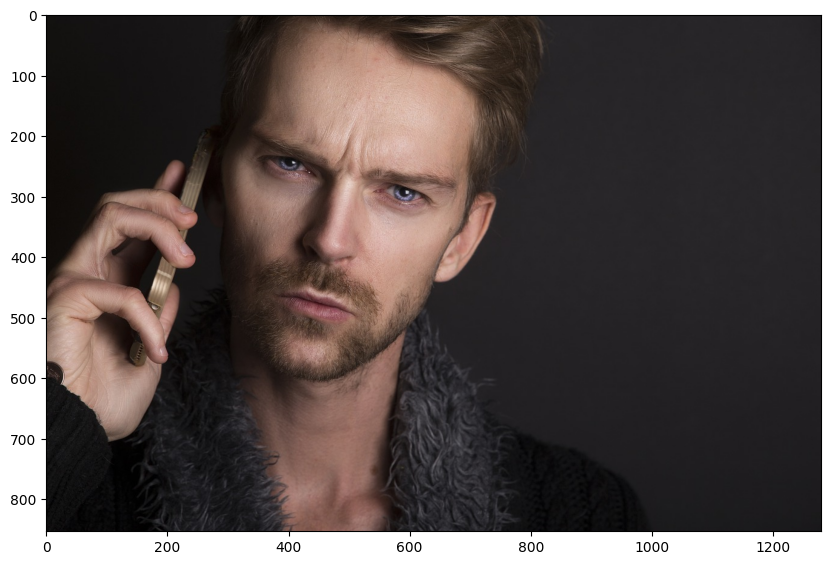

In [209]:
plt.figure(figsize = (10,10))
plt.imshow(serious_people)

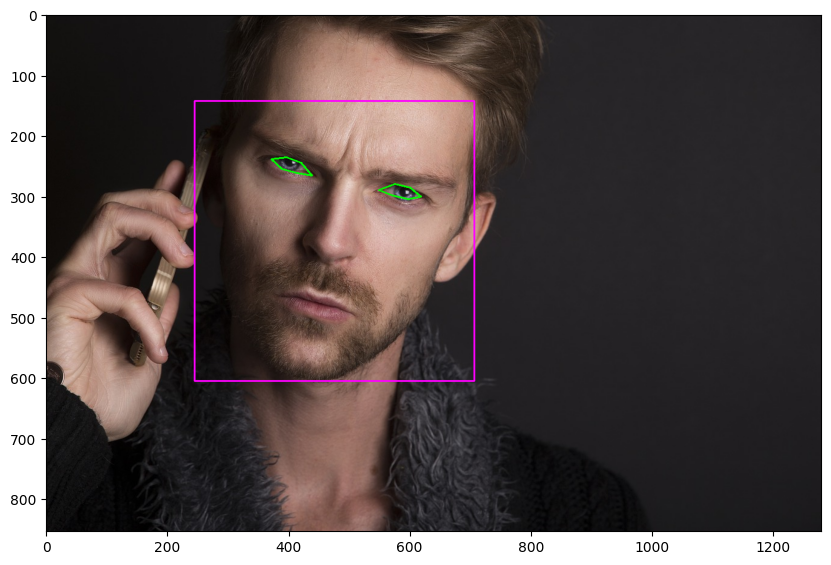

In [210]:
facial_marks = facial_marks_points(serious_people)
annoted_image = serious_people.copy()
annoted_image = annotate_convex_shell_marks(annoted_image, facial_marks)

plt.figure(figsize = (10,10))
plt.imshow(annoted_image)

In [211]:
right_eye_values = eye_aspect_ratio(facial_marks[0][right_eye])
left_eye_values = eye_aspect_ratio(facial_marks[0][left_eye])

print(f'Left eye {left_eye_values}')
print(f'Right eye {right_eye_values}')

Left eye 0.2727378578906134
Right eye 0.2699516362084509


# **Topics**
-   Como funciona a biblioteca DLib para detectar faces e extrair marcos faciais.
-   Extração dos marcos faciais utilizando o modelo treinado em 68 pontos.
-   Inspeção de regiões de rosto para leituras de medidas e identificação de comportamentos voltados a abertura da boca e dos olhos.
-   Conceitos de aspecto de razão.

